In [1]:
# MNIST Backprop To Find Optimal Input
# Abraham Oliver, 2016

# Plain python version in ../Tensorflow/mnist_backprop_inputs.py
# General structure from tensorflow.org
# Matplotlib help from http://tneal.org/post/tensorflow-ipython/TensorFlowMNIST/

In [2]:
# Import Tensorflow
import tensorflow as tf

In [3]:
# Initiate Session
sess = tf.InteractiveSession()

In [4]:
# Retrieve dataset
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
# Import MNIST dataset
mnist = input_data.read_data_sets("../../DataSets/MNIST/", one_hot=True)

Extracting ../../DataSets/MNIST/train-images-idx3-ubyte.gz
Extracting ../../DataSets/MNIST/train-labels-idx1-ubyte.gz
Extracting ../../DataSets/MNIST/t10k-images-idx3-ubyte.gz
Extracting ../../DataSets/MNIST/t10k-labels-idx1-ubyte.gz


In [6]:
# Import python3's print as a function
from __future__ import print_function

In [7]:
# Import numpy
import numpy as np

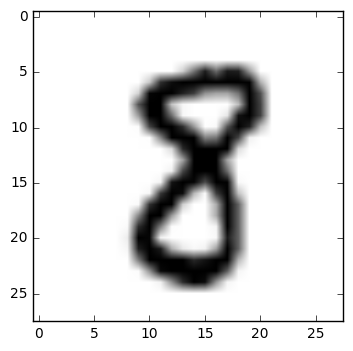

In [8]:
# Import tools for image visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

def showImage(img):
    """Display image of recovered digit"""
    tmp = img.reshape((28,28))
    plt.imshow(tmp, cmap = cm.Greys)
    plt.show()

# Test showImage on an image from the dataset
showImage(mnist.train.images[24601])

In [9]:
# Normal model

# Input
x = tf.placeholder(tf.float32, [None, 784])
# Weights
W = tf.Variable(tf.zeros([784, 10]))
# Biases
b = tf.Variable(tf.zeros([10]))
# Predicted Output
y = tf.nn.softmax(tf.matmul(x, W) + b)
# Correct Outputs
y_ = tf.placeholder(tf.float32, [None, 10])

# Training with cross-entropy cost and gradient descent with learning rate .5
loss = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.ProximalGradientDescentOptimizer(0.5).minimize(loss)

In [11]:
# Input backprop model

# Optimal Input variable (Only one item, unlike unknown above)
optimal = tf.Variable(tf.zeros([1, 784]))
# Predicted Output
predicted = tf.nn.softmax(tf.matmul(optimal, W) + b)
# Output to recreate
output = tf.placeholder(tf.float32, [None, 10])

# Training functions
optimal_train_loss = tf.reduce_mean(-tf.reduce_sum(output * tf.log(predicted), reduction_indices = [1]))
optimal_train_step = tf.train.ProximalGradientDescentOptimizer(0.5).minimize(
    optimal_train_loss)

In [13]:
# Initialize variables
sess.run(tf.initialize_all_variables())

In [18]:
# Train normal model
for i in range(1000):
    # Labels are the inputs and images are the outputs
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

print("BIASES")
print(b.eval())

BIASES
[-0.67364866  0.43680283  0.47615647 -0.43555635 -0.07359416  1.94755125
 -0.24125068  0.99020088 -2.0375731  -0.38907892]


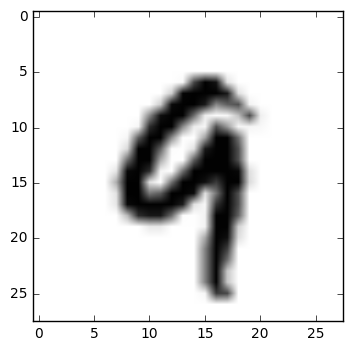

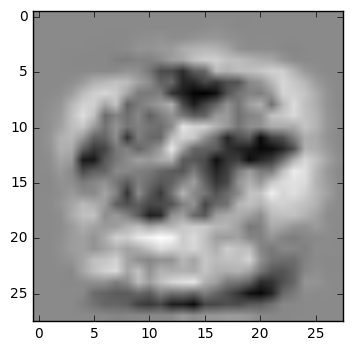

In [20]:
# Backprop model

# Label to optimize
label_to_opt = mnist.train.labels[24601]

# Train over data
for i in range(2000):
    # Create feed dict of same training value
    feed = np.array([label_to_opt for i in range(200)])
    sess.run(optimal_train_step, feed_dict={output: feed})

showImage(mnist.train.images[24601])
showImage(optimal.eval())